In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


## Question 1. Determine the number of missing values in each column.

In [220]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [221]:
nrows = df.shape[0]
(df.isnull().sum()/nrows)*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694465
vin              0.000716
state            0.000000
condition        2.110454
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

### transmission has 11% missing values of data which is more compared to other columns 

## Question 2. Check the data types.

In [222]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

In [223]:
df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [224]:
type(df['condition'].iloc[0])

str

In [225]:
type(df['mmr'].iloc[0])

str

### mmr is coded as string, it should be coded to int
### condition is coded as string, it should be coded to float

In [226]:
df['mmr'] = df['mmr'].astype(np.int64)

ValueError: invalid literal for int() with base 10: 'vw credit prequalified'

#### Since MMR has invalid literals which can be seen from above error,Removing rows where  it has some strings/invalid literals with some text in mmr column

In [227]:


df = df[~df['mmr'].str.contains(r'^[a-z].*$')]


In [228]:
df.shape

(558811, 16)

In [229]:
df['mmr'] = df['mmr'].astype(np.int64)

In [230]:

df['condition'] = df['condition'].astype(np.float64)

In [231]:
## converting date column datatype from string to date
df['saledate'] = pd.to_datetime(df['saledate'])

In [232]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

## Question 3. Analyze the make column.

In [233]:
df['make'].value_counts()

Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: make, Length: 96, dtype: int64

In [234]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 's

#### After observing and examining make column, it seeems there is no standardization and some kind of inconsistency in values of make column due to the usage of capitalization,short form . I noticed some values are capitalized and some are lowercase

In [235]:
len(df.make.unique())

97

In [236]:

df.make = df.make.str.lower()

len(df.make.unique())

67

#### Reduced unique values from 97 to 67

#### Further value reduction can be done by standardizing values but which requires understanding about brand names. I feel hard coding is required to do standardization

In [237]:
# Figured out which values got different names though they are similar  , and mapping those to same name
df['make'] = df['make'].replace("vw","volkswagen")
df['make'] = df['make'].replace(["mercedes-b","mercedes"], "mercedes-benz")
df['make'] = df['make'].replace("landrover", "land rover")
df['make'] = df['make'].replace("hyundai tk", "hyundai")
df['make'] = df['make'].replace(["ford truck","ford tk"], "ford")
df['make'] = df['make'].replace("dodge tk", "dodge")
df['make'] = df['make'].replace("chev truck", "chevrolet")
df['make'] = df['make'].replace("gmc tk", "gmc")
df['make'] = df['make'].replace("mazda tk", "mazda")

In [238]:
len(df.make.unique())

57

#### with standardization, unique values are further reduced to 57

## Question 4. Analyze the relationship between the wholeprice mmr and the salesprice.

In [242]:
df['mmr'].corr(df['sellingprice'])

0.9836337168977268

#### Overall correlation is 0.98

In [239]:
df[['mmr','sellingprice']]

,mmr,sellingprice
0,20500,21500
1,20800,21500
2,31900,30000
3,27500,27750
4,66000,67000
...,...,...
558832,35300,33000
558833,30200,30800
558834,29800,34000
558835,15100,11100


In [240]:
max(df['sellingprice'])

230000

[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000]
[0.87435427212496, 0.9584428323123234, 0.9744203460442978, 0.9791682459086491, 0.9812713466602424, 0.9822401960311052, 0.9827082643538246, 0.9831862576819862, 0.983426927459038, 0.983576112833006, 0.9835897120182316, 0.983672297305368, 0.9837452115182909, 0.9838139061890909, 0.9838873814578466, 0.9839572313793201, 0.9840077311787884, 0.9840226043763779, 0.9840312414363555, 0.9840312414363555, 0.9840312414363555, 0.9840312414363555, 0.9836337168977268]


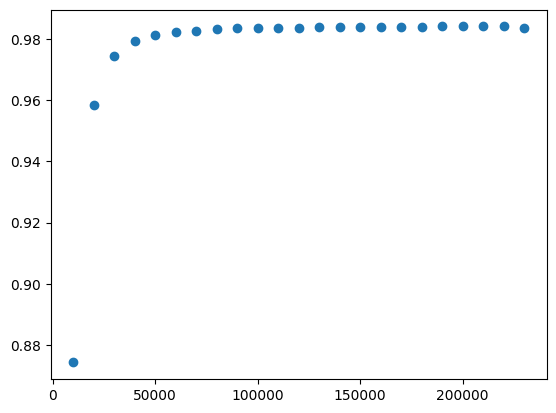

In [241]:
sp= []
corr= []
for i in range(10000, 240000, 10000):
    sp.append(i)
    df1 = df[(df['sellingprice']>=0) & (df['sellingprice']<=i)]
    corr.append(df1['mmr'].corr(df1['sellingprice']))
print(sp)
print(corr)
plt.scatter(sp,corr)
    

### As window of selling price increases,  correlation increases between mmr and selling price and it looks like relationship is directly proprotional

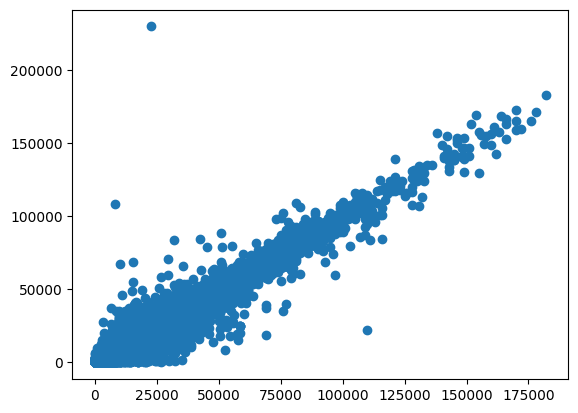

In [129]:
plt.scatter(df['mmr'], df['sellingprice'])

#### above is the scatterplot with the relation between mmr and selling price

## Question 5. How does the distribution of salesprice vary by make for cars made between 2010-2015?

Index(['ford', 'chevrolet', 'nissan', 'toyota', 'dodge', 'honda', 'hyundai',
       'bmw', 'kia', 'chrysler'],
      dtype='object')


<AxesSubplot: title={'center': 'sellingprice'}, xlabel='make'>

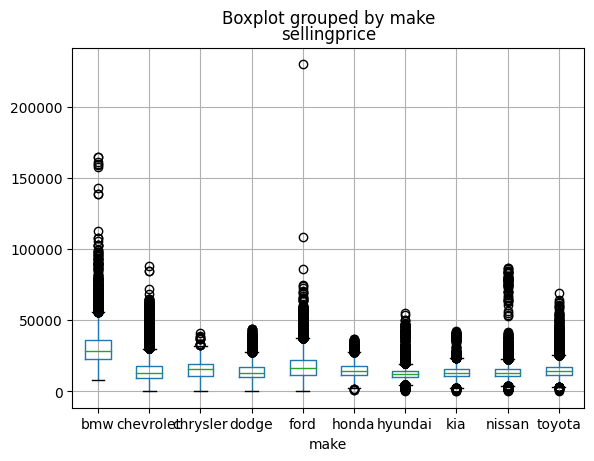

In [216]:
import seaborn as sns
df2 = df[df['year'].isin([2010, 2011,2012,2013,2014,2015])]
topten_make=df['make'].value_counts()[:10].index
print(topten_make)
df2 = df2[df2.make.isin(topten_make)]
df2.boxplot('sellingprice', 'make')
    
    
# sns.boxplot(y = df['sellingprice'][:10],x= df['make'][:10])

### Plotted above is  the boxplot for selling price grouped by top 10 makes  considering the data of only years(2010- 2015). For BMW sellilng price range minimum close to 30000 and max went till up close to 40000. BMW and ford range of selling price is bit huge. Hyundai,toyota,nissan remained with prices which are closer.

Index(['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler'],
      dtype='object')


<AxesSubplot: title={'center': 'sellingprice'}, xlabel='year'>

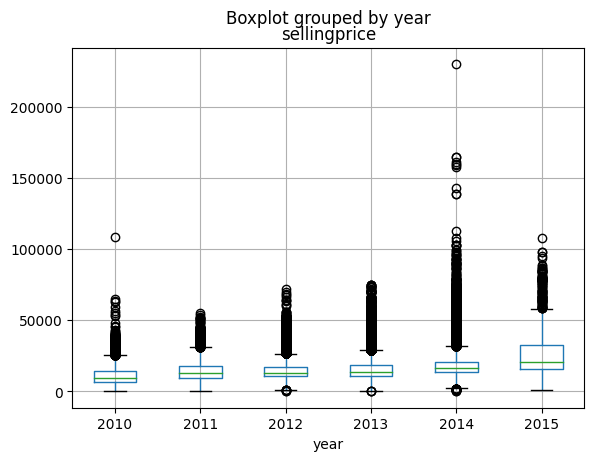

In [125]:
import seaborn as sns
df2 = df[df['year'].isin([2010, 2011,2012,2013,2014,2015])]
topten_make=df['make'].value_counts()[:10].index
print(topten_make)
df2 = df2[df2.make.isin(topten_make)]
df2.boxplot('sellingprice', 'year')
    
    

### Plotted above is  the boxplot for selling price grouped by year  considering the data of only top 10 makes

### Insights - From the boxplot, it can be seen from 2010 to 2014 sellingprice statistics(min,median,max) not changed a lot though there is slight increase in 2011 and 2014. But At the end of 2015, maximum value of selling price increased for top 10 makes,median value also increased